# Descriptive Statistics

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Show statistics in non-scientific format
pd.options.display.float_format = '{:.2f}'.format

## Import Data

In [2]:
# Load the data
data = pd.read_json('../data/kickstarter.json', lines=True)
print(data.shape)

(429463, 129)


## Check number of NAs in each column

In [3]:
# Get number of na values in each column
print(data.isna().sum())

id                                                                   0
photo_key                                                           75
photo_full                                                           0
photo_ed                                                             0
photo_med                                                            0
photo_little                                                         0
photo_small                                                          0
photo_thumb                                                          0
photo_1024x576                                                   10303
photo_1536x864                                                   10303
name                                                                 0
blurb                                                                0
goal                                                                 0
pledged                                                              0
state 

## Raw Data Descriptive Statistics

### Kickstarter by creation, launch and deadline

In [4]:
# First Kickstarter campaign date
first_kickstarter = data['launched_at'].min()
last_kickstarter = data['launched_at'].max()

print(f"First Kickstarter campaign: {first_kickstarter}")
print(f"Last Kickstarter campaign: {last_kickstarter}")

First Kickstarter campaign: 2009-04-24 19:52:03
Last Kickstarter campaign: 2024-10-09 12:55:10


In [30]:
# Show statistics of data by created year, launched year, and deadline year
data['created_at'] = pd.to_datetime(data['created_at'], unit='s')
data['launched_at'] = pd.to_datetime(data['launched_at'], unit='s')
data['deadline'] = pd.to_datetime(data['deadline'], unit='s')

data['created_year'] = data['created_at'].dt.year
data['launched_year'] = data['launched_at'].dt.year
data['deadline_year'] = data['deadline'].dt.year

# Show in one dataframe
years = pd.concat([data['created_year'].value_counts(), data['launched_year'].value_counts(), data['deadline_year'].value_counts()], axis = 1, keys=['Created Year', 'Launched Year', 'Deadline Year'])
years.sort_index()

,Created Year,Launched Year,Deadline Year
2009,1061,948,647
2010,7504,7104,6178
2011,17721,16615,15921
2012,29500,27033,27338
2013,30149,28571,28200
2014,49033,47329,45948
2015,53840,55613,55952
2016,38604,39370,39917
2017,35687,36079,36491
2018,30810,31024,31329


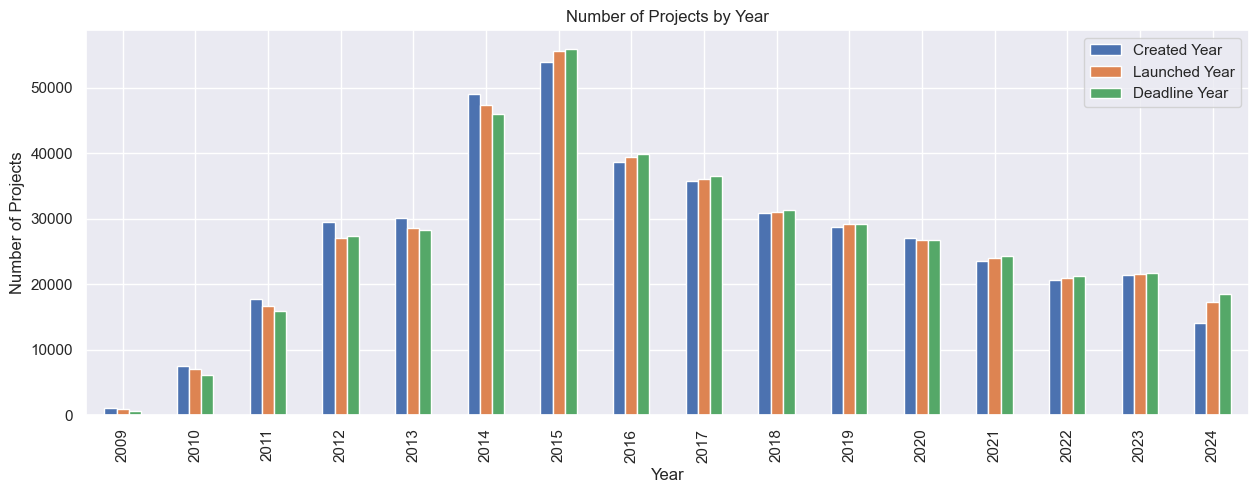

In [6]:
# Show in one plot
years.sort_index().plot(kind='bar', figsize=(15, 5))
plt.title('Number of Projects by Year')
plt.xlabel('Year')
plt.ylabel('Number of Projects')
plt.show()



### Kickstarters by Project State

In [7]:
# Get total number of projects
total_projects = len(data)
print(f'Total number of projects: {total_projects}')
print('\n')

# Total number of projects by state
projects_by_state = pd.concat([data['state'].value_counts(), data['state'].value_counts(normalize = True) * 100], axis = 1, keys=['Total', 'Percentage'])
print(projects_by_state)

Total number of projects: 429463


             Total  Percentage
state                         
successful  244112       56.84
failed      164377       38.28
canceled     20974        4.88


### Kickstarters by Country

In [8]:
country_data = pd.concat([data['country'].value_counts(), data['country'].value_counts(normalize = True) * 100], axis = 1, keys=['Total', 'Percentage'])
print(country_data)

          Total  Percentage
country                    
US       300776       70.04
GB        45402       10.57
CA        19627        4.57
AU         9885        2.30
DE         7494        1.74
FR         6053        1.41
IT         5613        1.31
ES         5167        1.20
MX         4959        1.15
HK         4231        0.99
NL         3581        0.83
SE         2720        0.63
SG         1882        0.44
JP         1818        0.42
NZ         1728        0.40
DK         1690        0.39
CH         1381        0.32
IE         1194        0.28
BE         1156        0.27
AT          971        0.23
NO          864        0.20
PL          692        0.16
GR          378        0.09
LU          112        0.03
SI           89        0.02


### Kickstarters by Category

In [9]:
data['category_name'].value_counts()

category_name
Tabletop Games        23986
Product Design        19221
Fiction               10908
Comic Books           10757
Apps                  10417
Apparel                9848
Video Games            9764
Illustration           8924
Children's Books       8910
Shorts                 8844
Nonfiction             8144
Accessories            7772
Documentary            7486
Web                    6985
Playing Cards          6906
Art                    6857
Rock                   6795
Webseries              6052
Indie Rock             5990
Country & Folk         5753
Gadgets                5601
Graphic Novels         5581
Narrative Film         5552
Hardware               5523
Hip-Hop                4766
Music                  4552
Restaurants            4475
Painting               4468
Software               4405
Pop                    4387
Comedy                 4229
Art Books              4229
Theater                4161
Mixed Media            4144
Animation              4138
Drinks

### Kickstarters by Dollar Goal Bins

In [31]:
data['pledged_usd_static'] = data['pledged'] * data['static_usd_rate']
data['goal_usd_static'] = data['goal'] * data['static_usd_rate']

bins = [0, 10, 100, 1000, 10000, 100000, 1000000, np.inf]

data['Goal Bins (in US$)'] = pd.cut(data['goal_usd_static'], bins, labels = ['$1-$10', '$10-$100', '$100-$1k', '$1k-$10k', '$10k-$100k', '$100k-$1M', '$1M+'])
# Also create a percentage of total in each bin
bins = pd.concat([data['Goal Bins (in US$)'].value_counts(), data['Goal Bins (in US$)'].value_counts(normalize = True) * 100], axis = 1, keys=['Total', 'Percentage'])
print(bins.sort_index())

                     Total  Percentage
Goal Bins (in US$)                    
$1-$10                1188        0.28
$10-$100              7311        1.70
$100-$1k             81754       19.04
$1k-$10k            219664       51.15
$10k-$100k          108971       25.37
$100k-$1M             9664        2.25
$1M+                   911        0.21


### Kickstarter by Average Duration

In [11]:
# Calculate the average duration of Kickstarter
data['duration'] = (data['deadline'] - data['launched_at']).dt.days

# Calculate the average duration of Kickstarter by state
duration_by_state = data.groupby('category_name')['duration']
duration_by_state = pd.concat([duration_by_state.mean(), duration_by_state.median(), duration_by_state.min(), duration_by_state.max()], axis = 1, keys=['Mean', 'Median', 'Minimum', 'Maximum'])
print(duration_by_state)

                    Mean  Median  Minimum  Maximum
category_name                                     
3D Printing        33.69   30.00        3       89
Academic           36.22   30.00        1       67
Accessories        28.87   30.00        1       60
Action             37.29   30.00        1       60
Animals            32.90   30.00        6       60
Animation          37.43   30.00        1       90
Anthologies        31.21   30.00        2       66
Apparel            33.11   30.00        1      120
Apps               37.14   30.00        1       92
Architecture       36.72   30.00        4       60
Art                28.18   30.00        1       91
Art Books          32.90   30.00        1       90
Audio              34.53   30.00        5       60
Bacon              33.80   30.00        2       60
Blues              34.88   30.00        3       60
Calendars          28.97   30.00        3       60
Camera Equipment   34.86   30.00        5       60
Candles            33.97   30.0

## First Project Descriptive Statistics

In [32]:
#Import Data
creator_data = pd.read_json('../data/creator_first_project.json', lines = True)
creator_data.shape

(328652, 148)

### Creators by Launch Year

In [33]:
# Get number of creators by creation year, launch year, and deadline year
date_columns = ['launched_at', 'created_at', 'deadline']
creator_data[date_columns] = creator_data[date_columns].apply(pd.to_datetime, unit='s')

creator_data['launched_year'] = creator_data['launched_at'].dt.year
creator_data['created_year'] = creator_data['created_at'].dt.year
creator_data['deadline_year'] = creator_data['deadline'].dt.year

# Show in one dataframe
years = pd.concat([creator_data['launched_year'].value_counts(), creator_data['created_year'].value_counts(), creator_data['deadline_year'].value_counts()], axis = 1, keys=['launched_year', 'created_year', 'deadline_year'])
years.sort_index()


,launched_year,created_year,deadline_year
2009,883,990,597
2010,6701,7079,5821
2011,15222,16183,14650
2012,23981,26112,24291
2013,24627,25848,24320
2014,40799,42282,39580
2015,47474,45742,47803
2016,32062,31205,32578
2017,27566,27064,27969
2018,22108,21860,22405


### Creators by Project State

In [34]:
# Get total number of projects
total_projects = len(creator_data)
print(f'Total number of projects: {total_projects}')
print('\n')

# Total number of projects by state
projects_by_state = pd.concat([creator_data['state'].value_counts(), creator_data['state'].value_counts(normalize = True) * 100], axis = 1, keys=['Total', 'Percentage'])
print(projects_by_state)

Total number of projects: 328652


             Total  Percentage
state                         
successful  163258       49.68
failed      147189       44.79
canceled     18205        5.54


In [ ]:
creator_data['us'] = 0
creator_data.loc[creator_data['country'] == 'US', 'us'] = 1
creator_data['dollars_to_goal'] = creator_data['usd_pledged'] - creator_data['usd_goal']

creator_data.groupby(['state'i]).agg({'us': 'sum',
                                     'dollars_to_goal': 'mean',
                                     'dollars_to_goal': 'mean',
                                     'usd_pledged': 'mean',
                                     'id': 'count'})

,us,dollars_to_goal,usd_pledged,id
state,,,,
canceled,12129,-107613.68,1864.62,18205
failed,103336,-63909.57,1194.00,147189
successful,116331,14224.96,23339.56,163258


### Creators by Country

In [15]:
country_data = pd.concat([creator_data['country'].value_counts(), creator_data['country'].value_counts(normalize = True) * 100], axis = 1, keys=['Total', 'Percentage'])
print(country_data)

          Total  Percentage
country                    
US       231796       70.53
GB        33178       10.10
CA        14704        4.47
AU         7654        2.33
DE         5772        1.76
FR         4655        1.42
IT         4257        1.30
MX         4179        1.27
ES         3741        1.14
HK         2963        0.90
NL         2800        0.85
SE         2131        0.65
DK         1381        0.42
NZ         1341        0.41
JP         1323        0.40
SG         1316        0.40
CH         1159        0.35
IE          960        0.29
BE          916        0.28
AT          838        0.25
NO          721        0.22
PL          464        0.14
GR          239        0.07
LU           93        0.03
SI           71        0.02


### Creators by Category

In [16]:
category_data = pd.concat([creator_data['category_name'].value_counts(), creator_data['category_name'].value_counts(normalize = True) * 100], axis = 1, keys=['Total', 'Percentage'])
print(category_data)

                    Total  Percentage
category_name                        
Product Design      12382        3.77
Apps                 9627        2.93
Tabletop Games       9532        2.90
Apparel              8587        2.61
Shorts               8082        2.46
Fiction              8069        2.46
Video Games          8018        2.44
Children's Books     7511        2.29
Nonfiction           7024        2.14
Documentary          6556        1.99
Web                  6420        1.95
Rock                 6012        1.83
Webseries            5381        1.64
Indie Rock           5237        1.59
Narrative Film       4854        1.48
Country & Folk       4828        1.47
Accessories          4676        1.42
Illustration         4659        1.42
Hardware             4651        1.42
Gadgets              4561        1.39
Hip-Hop              4385        1.33
Restaurants          4153        1.26
Software             3956        1.20
Pop                  3907        1.19
Music       

### Creators by Dollar Goal Bins

In [17]:
creator_data['pledged_usd_static'] = creator_data['pledged'] * creator_data['static_usd_rate']
creator_data['goal_usd_static'] = creator_data['goal'] * creator_data['static_usd_rate']

bins = [0, 10, 100, 1000, 10000, 100000, 1000000, np.inf]

creator_data['Goal Bins (in US$)'] = pd.cut(creator_data['goal_usd_static'], bins, labels = ['$1-$10', '$10-$100', '$100-$1k', '$1k-$10k', '$10k-$100k', '$100k-$1M', '$1M+'])
# Also create a percentage of total in each bin
bins = pd.concat([creator_data['Goal Bins (in US$)'].value_counts(), creator_data['Goal Bins (in US$)'].value_counts(normalize = True) * 100], axis = 1, keys=['Total', 'Percentage'])
print(bins.sort_index())

                     Total  Percentage
Goal Bins (in US$)                    
$1-$10                 661        0.20
$10-$100              3596        1.09
$100-$1k             51654       15.72
$1k-$10k            171908       52.31
$10k-$100k           91211       27.75
$100k-$1M             8789        2.67
$1M+                   833        0.25


### Creators by Average Duration

In [18]:
# Calculate the average duration of Kickstarter
creator_data['duration'] = (creator_data['deadline'] - creator_data['launched_at']).dt.days

# Calculate the average duration of Kickstarter by state
duration_by_state = creator_data.groupby('category_name')['duration']
duration_by_state = pd.concat([duration_by_state.mean(), duration_by_state.median(), duration_by_state.min(), duration_by_state.max()], axis = 1, keys=['Mean', 'Median', 'Minimum', 'Maximum'])
print(duration_by_state)

                    Mean  Median  Minimum  Maximum
category_name                                     
3D Printing        34.73   30.00        4       89
Academic           36.52   30.00        1       67
Accessories        31.26   30.00        1       60
Action             37.71   30.00        1       60
Animals            33.61   30.00        7       60
Animation          37.74   30.00        5       90
Anthologies        33.82   30.00        3       66
Apparel            33.53   30.00        1      120
Apps               37.14   30.00        1       92
Architecture       36.86   30.00        4       60
Art                31.38   30.00        1       91
Art Books          33.96   30.00        1       90
Audio              34.59   30.00        7       60
Bacon              33.84   30.00        2       60
Blues              35.55   30.00        3       60
Calendars          30.65   30.00        3       60
Camera Equipment   34.57   30.00        5       60
Candles            34.28   30.0

## Regression Discontinuity Descriptive Statistics

Create Running and Treated Variables

In [19]:
# Create Running Variable
creator_data['dollars_to_goal'] = creator_data['goal_usd_static'] - creator_data['pledged_usd_static']

# Create Treated Variable
creator_data['treated'] = 0
creator_data.loc[creator_data['dollars_to_goal'] >= 0, 'treated'] = 1

Create Dummy for Country

In [20]:
# Create US Dummy Variable
creator_data['us'] = 0
creator_data.loc[creator_data['country'] == 'US', 'us'] = 1


Fill NAs for Staff Pick

In [21]:
# Replace NAs in staff pick with 0
creator_data['staff_pick'] = creator_data['staff_pick'].fillna(0)

Variables for Summary Statistics

In [22]:
sum_vars = ['us', 'staff_pick', 'backers_count', 'duration', 'goal_usd_static', 'pledged_usd_static']

## Summary Statistics by Treated

### Treated vs Control Statistics

In [23]:
treated_statistics = creator_data.groupby('treated')[sum_vars].agg({'count', 'mean', 'std', 'median'}).T
treated_statistics

treated                           0          1
us                 std         0.45       0.46
                   count  159532.00  169120.00
                   median      1.00       1.00
                   mean        0.71       0.70
staff_pick         std         0.40       0.17
                   count  159532.00  169120.00
                   median      0.00       0.00
                   mean        0.20       0.03
backers_count      std      1331.50      67.49
                   count  159532.00  169120.00
                   median     74.00       3.00
                   mean      251.84      14.17
duration           std        11.43      13.36
                   count  159532.00  169120.00
                   median     30.00      30.00
                   mean       32.49      35.89
goal_usd_static    std     25693.63 1461934.25
                   count  159532.00  169120.00
                   median   4000.00    7500.00
                   mean     9281.09   68489.72
pledged_usd_static std    138647.42    6505.38
                   count  159532.00  169120.00
                   median   5443.00      85.00
                   mean    23867.65    1255.94

### Distribution of Goal Amount by Treated

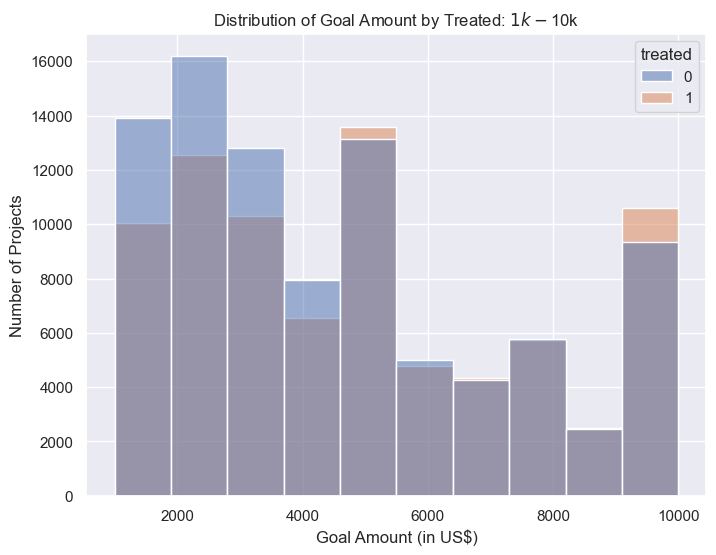

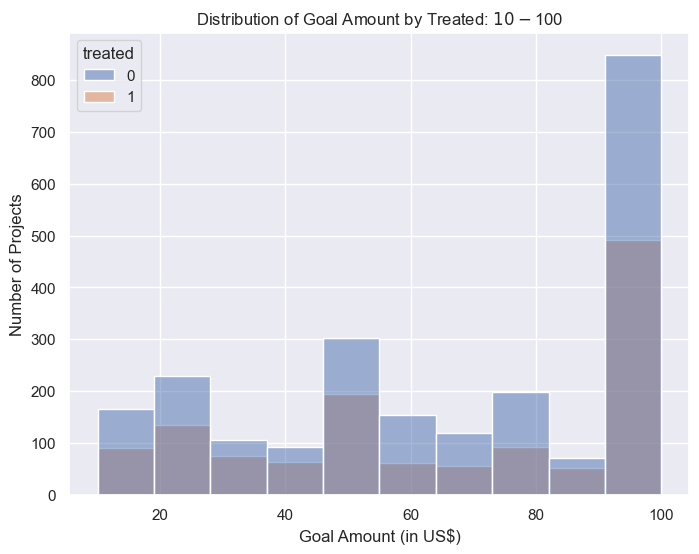

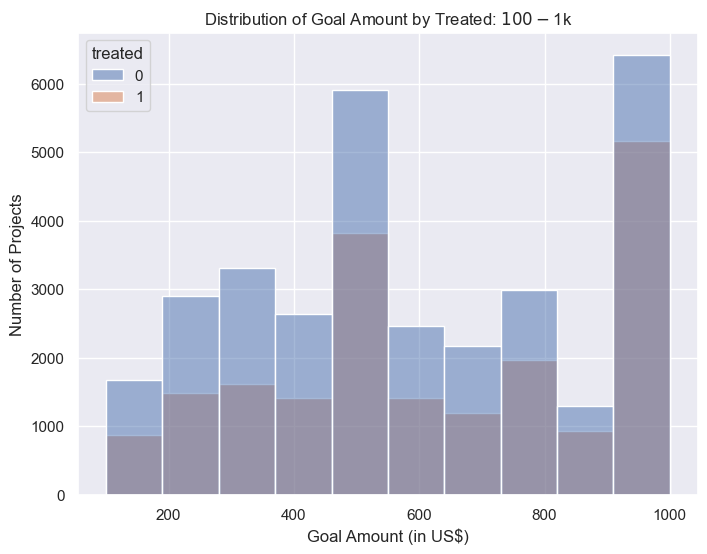

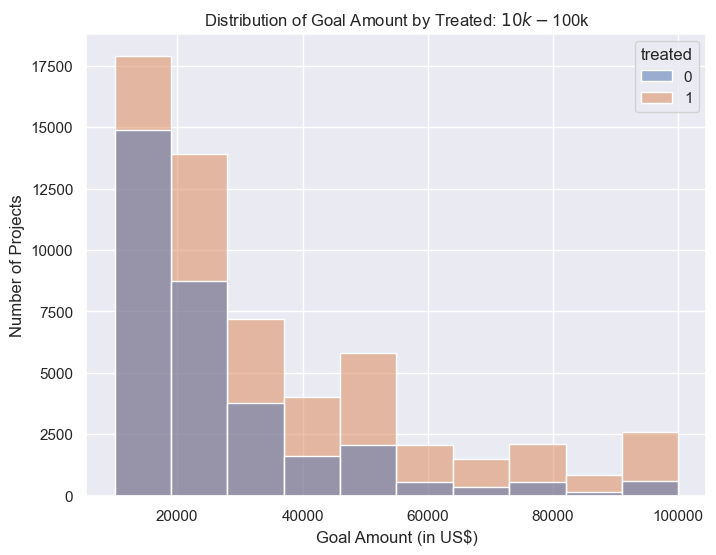

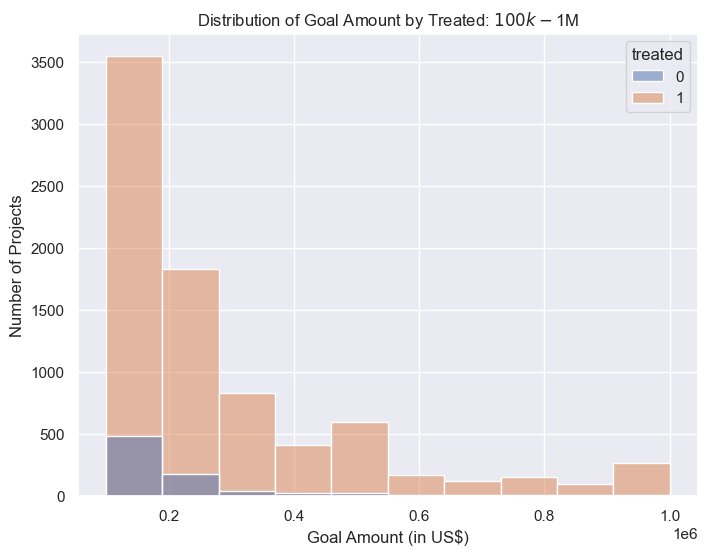

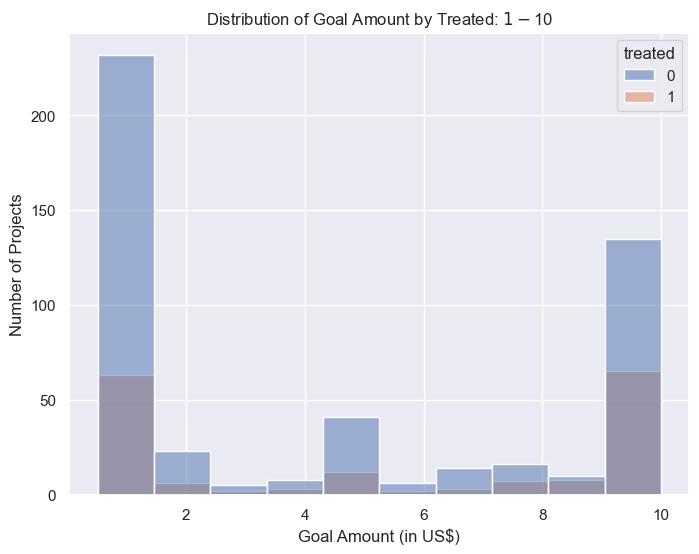

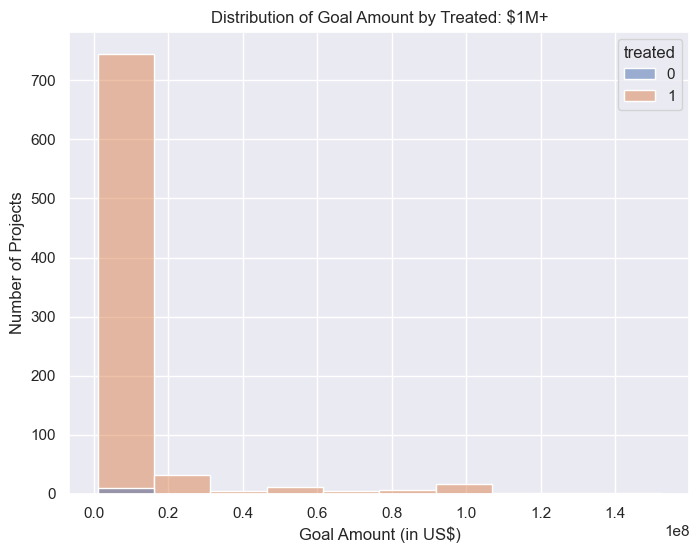

In [24]:
# Loop through each bin and create a separate plot
for bin_range in creator_data['Goal Bins (in US$)'].unique():
    bin_data = creator_data[creator_data['Goal Bins (in US$)'] == bin_range]
    
    # Plot distribution of Goal Amount by Treated for the current bin
    plt.figure(figsize=(8, 6))
    sns.histplot(data=bin_data, x='goal_usd_static', hue='treated', bins=10, kde=False)
    plt.title(f'Distribution of Goal Amount by Treated: {bin_range}')
    plt.xlabel('Goal Amount (in US$)')
    plt.ylabel('Number of Projects')
    plt.show()

### Distribution of Entrpreneurs near cutoff

In [25]:
creator_data['dollars_to_goal_usd'] = creator_data['pledged_usd_static'] - creator_data['goal_usd_static']

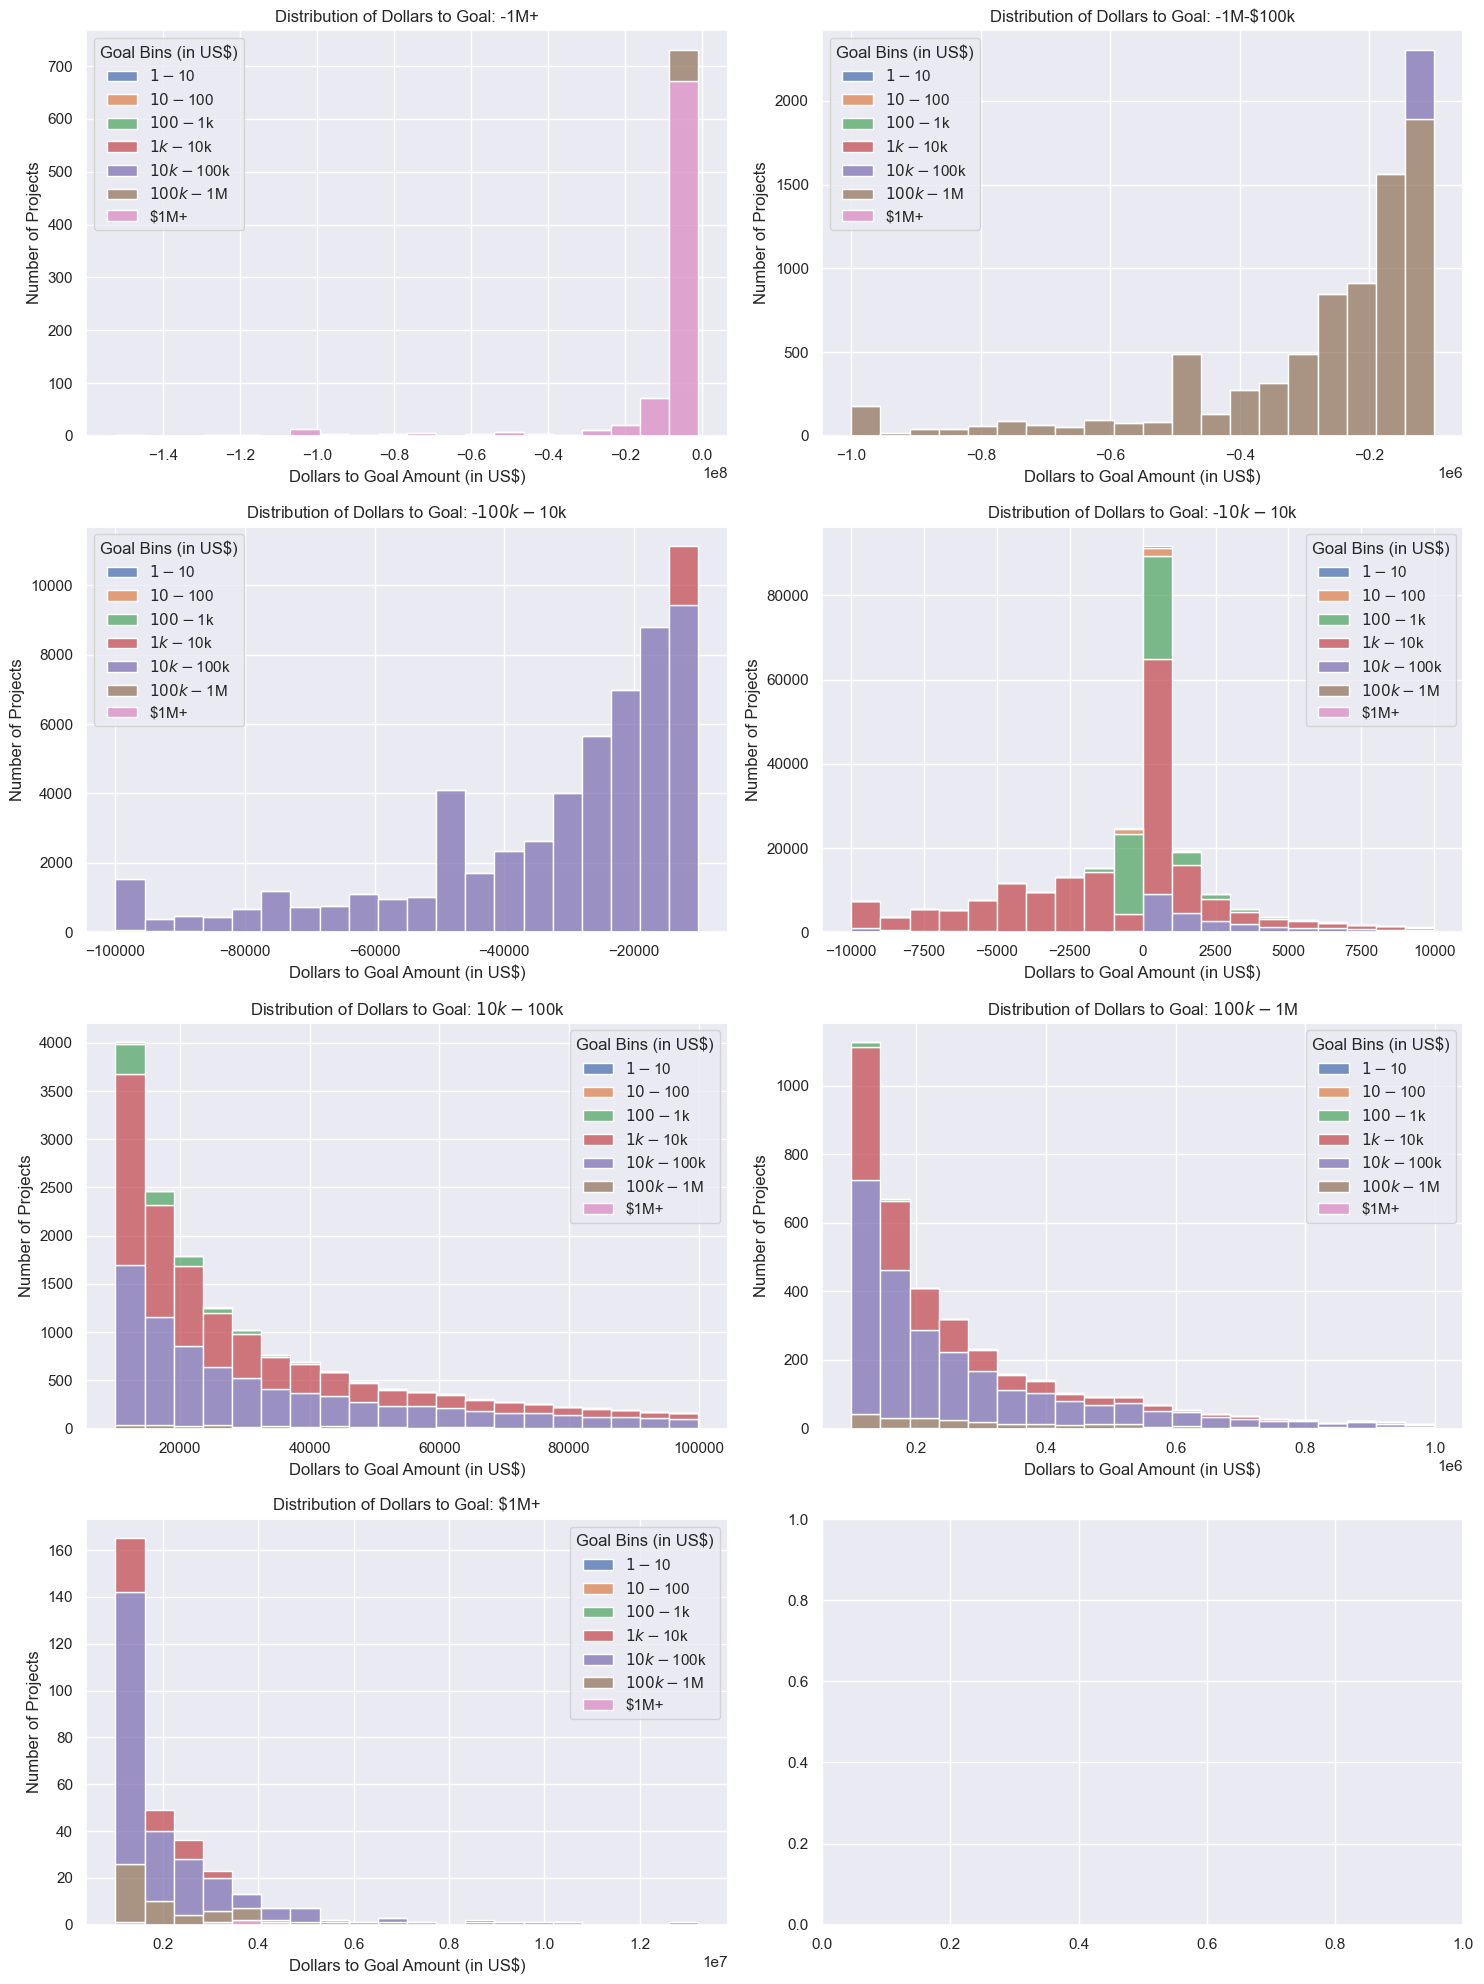

In [26]:
# Define bins
dollars_to_goal_bins = [-np.inf, -1000000, -100000, -10000, 10000, 100000, 1000000, np.inf]
creator_data['Dollars to Goal Bins (in US$)'] = pd.cut(
    creator_data['dollars_to_goal_usd'], 
    dollars_to_goal_bins, 
    labels=['-1M+', '-1M-$100k', '-$100k-$10k', '-$10k-$10k', '$10k-$100k', '$100k-$1M', '$1M+']
)

duration_bins = [0, 30, 60, 90, np.inf]
creator_data['Duration Bins'] = pd.cut(
    creator_data['duration'], 
    duration_bins, 
    labels=['0-30', '30-60', '60-90', '90+']
)

# Create a figure and subplots
num_bins = len(dollars_to_goal_bins) - 1  # Number of bins
fig, axes = plt.subplots(4, 2, figsize=(15, 20))  # Create a grid of subplots
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

# Loop through each bin and plot
for i, bin_range in enumerate(creator_data['Dollars to Goal Bins (in US$)'].unique().sort_values()):
    bin_data = creator_data[creator_data['Dollars to Goal Bins (in US$)'] == bin_range]
    
    # Plot on the corresponding subplot
    sns.histplot(
        data=bin_data, 
        x='dollars_to_goal_usd', 
        bins=20, 
        kde=False, 
        hue='Goal Bins (in US$)', 
        multiple='stack', 
        ax=axes[i]
    )
    axes[i].set_title(f'Distribution of Dollars to Goal: {bin_range}')
    axes[i].set_xlabel('Dollars to Goal Amount (in US$)')
    axes[i].set_ylabel('Number of Projects')

# Adjust layout
plt.tight_layout()
plt.show()

# Suspended Kickstarter Analysis

In [27]:
suspended_df = pd.read_json('../data/suspended_data.json', lines = True)
suspended_df.shape

(32707, 121)

In [28]:
# Clean the Data

# Drop duplicates
suspended_df = suspended_df.drop_duplicates(subset = ['creator_id', 'id', 'created_at'])
print(suspended_df.shape)



(1108, 121)


In [29]:
suspended_df[['creator_id', 'id', 'name', 'creator_name', 'created_at']].sort_values(by = ['created_at']).head(10)

,creator_id,id,name,creator_name,created_at
32028,2134531161,495752497,Around the world in 30 years! (Suspended),Slavica,2010-11-20 03:48:49
16585,1274167809,2077284780,Using Music To Help Save Lives ! (Suspended),Ghislain,2011-03-16 15:27:31
552,1540240232,1822406878,Pillows for Puppies! (Suspended),Jen Small,2011-03-18 22:24:40
16347,904982694,1450592223,"""Just Say"" Voice messages on facebook, twitter...",ArsenSayyants (deleted),2011-03-23 06:48:14
564,967174811,2088258706,Step into the ring! (Suspended),Ryan Koch,2011-04-13 00:48:22
16609,308805983,1513121052,[Mixtape] Spohkes - Kill Switch Vol. 1 (Help f...,Spohkes,2011-04-19 21:42:32
549,607061012,133763622,The Fallout Festival - Street Art & Music Fest...,Nick Allain,2011-05-08 17:28:18
136,273996435,306628368,You Want Performance Art from the Sky! (Suspen...,Jeslen,2011-05-15 20:58:54
16645,125286230,1400753280,the $1 Violin Show (Suspended),Avi Pilcer,2011-06-01 08:22:29
16528,1519126188,1688514241,Announcing -- Almost Magical - Book of Inspira...,Danny Pettry,2011-06-26 03:18:54
